# Importation des packages

In [1]:
# Importer les modules nécessaires
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/ensai/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Chargement des données

Les données concernent des campagnes de marketing direct (appels téléphoniques) d'une institution bancaire portugaise.

In [4]:
bankdata=pd.read_csv("bank_cleaned.csv",sep=",",index_col=0)

In [5]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


## Description de la base de données "bank_cleaned.csv"

La base de données "bank_cleaned.csv" contient des données sur les campagnes de marketing direct (appels téléphoniques) d'une institution bancaire portugaise. Les données ont été nettoyées et préparées pour l'analyse.

Les caractéristiques (variables explicatives) enregistrées pour chaque client sont les suivantes :

-age : l'âge du client (variable numérique)

-job : la profession du client (variable catégorielle)

-marital : l'état matrimonial du client (variable catégorielle)

-education : le niveau d'éducation du client (variable catégorielle)

-default : indique si le client a un crédit en défaut ou non (variable catégorielle)

-balance : le solde du compte du client (variable numérique)

-housing : indique si le client a un prêt immobilier ou non (variable catégorielle)

-loan : indique si le client a un prêt personnel ou non (variable catégorielle)

-day : le jour du mois de la dernière communication avec le client (variable numérique)

-month : le mois de la dernière communication avec le client (variable catégorielle)

-duration : la durée de la dernière communication avec le client, en secondes (variable numérique)

-campaign : le nombre de contacts effectués au cours de cette campagne pour ce client (variable numérique)

-pdays : le nombre de jours écoulés depuis le dernier contact avec le client lors d'une campagne précédente (variable numérique ; 999 signifie que le client n'a pas été contacté précédemment)

-previous : le nombre de contacts effectués avant cette campagne pour ce client (variable numérique)

-poutcome : le résultat de la précédente campagne marketing (variable catégorielle)

-response : la réponse du client à la dernière campagne marketing (variable catégorielle)

-response_binary : la réponse du client à la dernière campagne marketing, encodée en binaire (0 = pas intéressé, 1 = intéressé) (variable numérique)


La variable cible est :

- response_binary : a-t-il souscrit un dépôt à terme ? (variable catégorielle)

Les données ont été préparées pour l'analyse en remplaçant les valeurs manquantes par des valeurs médianes ou moyennes, en convertissant les variables catégorielles en variables binaires, et en supprimant les variables inutiles ou redondantes.

La base de données contient 4521 entrées (lignes) et 9 caractéristiques (colonnes).


In [8]:
# Renommer les colonnes
bankdata.rename(columns={
    'age': 'age',
    'job': 'profession',
    'marital': 'situation_familiale',
    'education': 'niveau_etudes',
    'default': 'defaut_credit',
    'balance': 'solde_bancaire',
    'housing': 'pret_immobilier',
    'loan': 'pret_personnel',
    'day': 'jour_du_mois',
    'month': 'mois',
    'duration': 'duree_appel',
    'campaign': 'nb_appels',
    'pdays': 'nb_jours_depuis_dernier_appel',
    'previous': 'nb_appels_precedents',
    'poutcome': 'resultat_campagne_precedente',
    'response': 'reponse_campagne_actuelle',
    'response_binary': 'reponse_campagne_actuelle_binaire'
}, inplace=True)

# Afficher les noms de colonnes mis à jour
print(bankdata.columns)

Index(['age', 'profession', 'situation_familiale', 'niveau_etudes',
       'defaut_credit', 'solde_bancaire', 'pret_immobilier', 'pret_personnel',
       'jour_du_mois', 'mois', 'duree_appel', 'nb_appels',
       'nb_jours_depuis_dernier_appel', 'nb_appels_precedents',
       'resultat_campagne_precedente', 'reponse_campagne_actuelle',
       'reponse_campagne_actuelle_binaire'],
      dtype='object')


## Qualité des données

In [9]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40841 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                40841 non-null  int64  
 1   profession                         40841 non-null  object 
 2   situation_familiale                40841 non-null  object 
 3   niveau_etudes                      40841 non-null  object 
 4   defaut_credit                      40841 non-null  object 
 5   solde_bancaire                     40841 non-null  int64  
 6   pret_immobilier                    40841 non-null  object 
 7   pret_personnel                     40841 non-null  object 
 8   jour_du_mois                       40841 non-null  int64  
 9   mois                               40841 non-null  object 
 10  duree_appel                        40841 non-null  float64
 11  nb_appels                          40841 non-null  int64  


In [10]:
bankdata.describe(include="all")

,age,profession,situation_familiale,niveau_etudes,defaut_credit,solde_bancaire,pret_immobilier,pret_personnel,jour_du_mois,mois,duree_appel,nb_appels,nb_jours_depuis_dernier_appel,nb_appels_precedents,resultat_campagne_precedente,reponse_campagne_actuelle,reponse_campagne_actuelle_binaire
count,40841.000000,40841,40841,40841,40841,40841.000000,40841,40841,40841.000000,40841,40841.000000,40841.000000,40841.000000,40841.000000,40841,40841,40841.000000
unique,NaN,12,3,3,2,NaN,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,may,NaN,NaN,NaN,NaN,unknown,no,NaN
freq,NaN,8805,24641,21933,40078,NaN,22820,34042,NaN,12496,NaN,NaN,NaN,NaN,34802,36202,NaN
mean,40.790676,NaN,NaN,NaN,NaN,1073.981807,NaN,NaN,15.863666,NaN,4.308949,2.774149,32.248304,0.436791,NaN,NaN,0.113587
std,10.475473,NaN,NaN,NaN,NaN,1712.556186,NaN,NaN,8.313608,NaN,4.305823,3.104177,90.738402,1.572342,NaN,NaN,0.317313
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,1.000000,NaN,0.100000,1.000000,-1.000000,0.000000,NaN,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,8.000000,NaN,1.730000,1.000000,-1.000000,0.000000,NaN,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,421.000000,NaN,NaN,16.000000,NaN,3.000000,2.000000,-1.000000,0.000000,NaN,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,1333.000000,NaN,NaN,21.000000,NaN,5.300000,3.000000,-1.000000,0.000000,NaN,NaN,0.000000


In [11]:
bankdata.isnull().sum()

age                                  0
profession                           0
situation_familiale                  0
niveau_etudes                        0
defaut_credit                        0
solde_bancaire                       0
pret_immobilier                      0
pret_personnel                       0
jour_du_mois                         0
mois                                 0
duree_appel                          0
nb_appels                            0
nb_jours_depuis_dernier_appel        0
nb_appels_precedents                 0
resultat_campagne_precedente         0
reponse_campagne_actuelle            0
reponse_campagne_actuelle_binaire    0
dtype: int64

# Descripition de la base de données

In [12]:
# Créer une nouvelle version de la base de données sans la variable "response"
bankdata_new = bankdata.drop(columns=['reponse_campagne_actuelle_binaire'])
bankdata_new.head()

,age,profession,situation_familiale,niveau_etudes,defaut_credit,solde_bancaire,pret_immobilier,pret_personnel,jour_du_mois,mois,duree_appel,nb_appels,nb_jours_depuis_dernier_appel,nb_appels_precedents,resultat_campagne_precedente,reponse_campagne_actuelle
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no


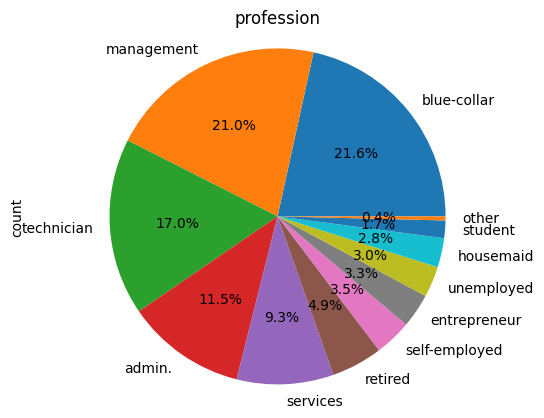

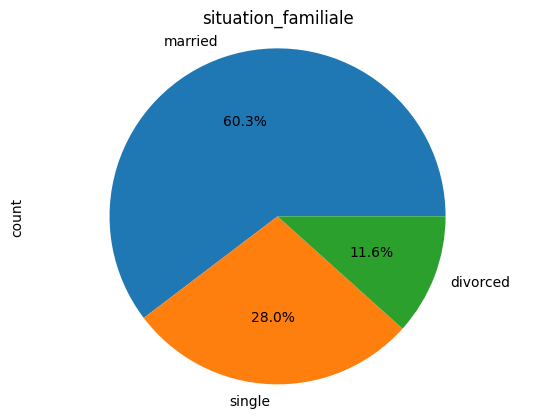

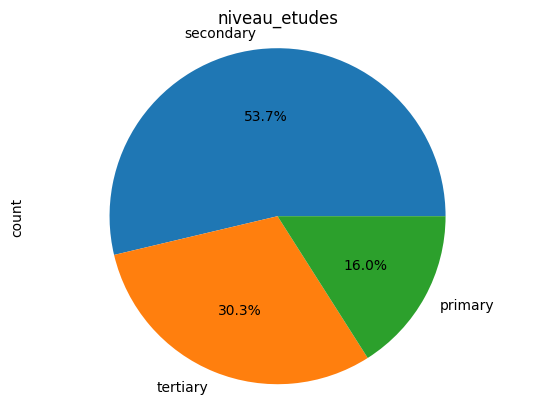

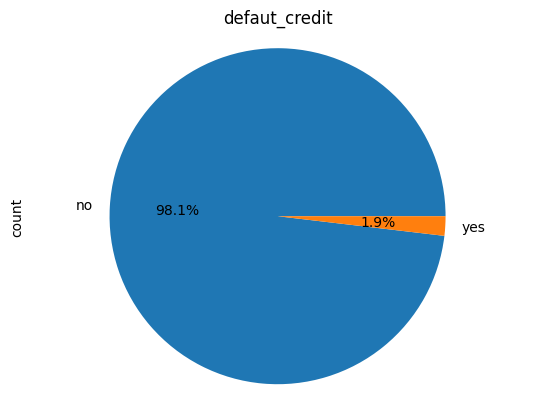

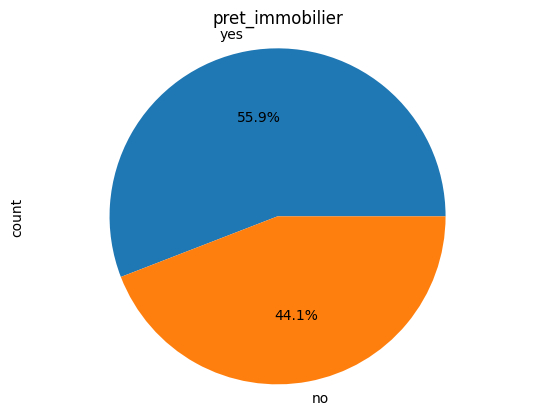

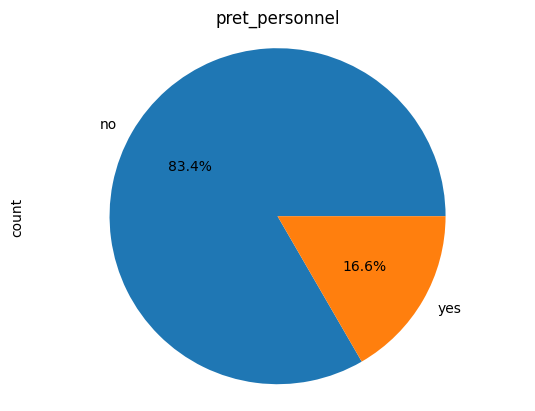

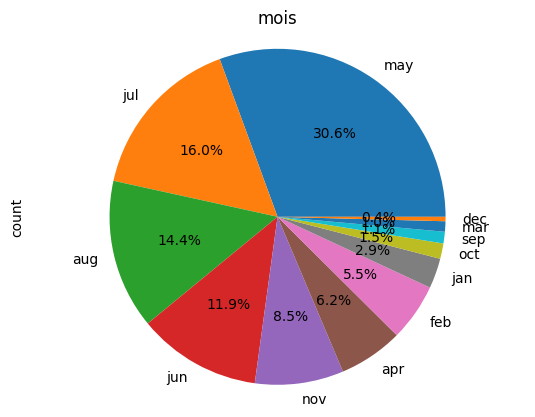

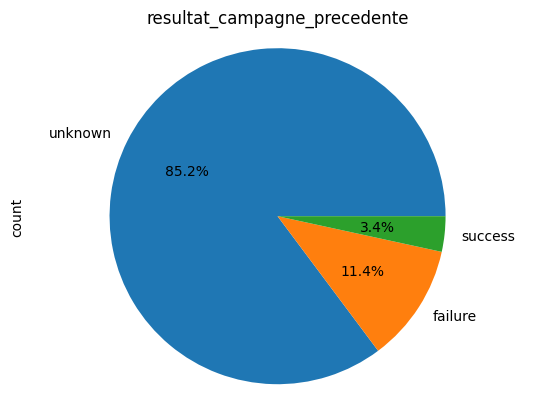

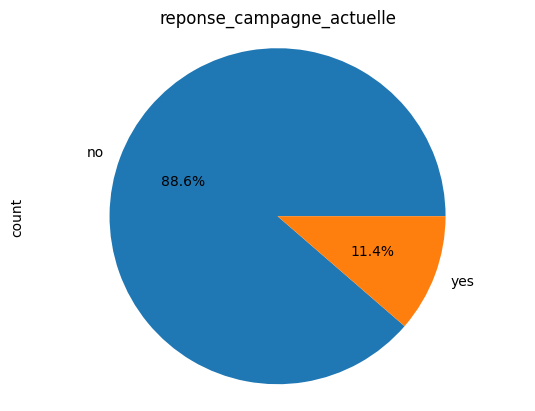

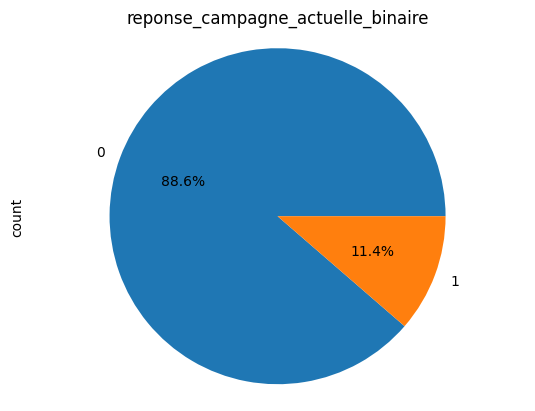

In [13]:


# Sélectionner les variables catégorielles
cat_vars = ['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier', 'pret_personnel',
             'mois', 'resultat_campagne_precedente', 'reponse_campagne_actuelle', 'reponse_campagne_actuelle_binaire']


# Générer un pie plot pour chaque variable catégorielle
for var in cat_vars:
    bankdata[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()


### analyse 

Lors de l'analyse, il est constaté que plus de 88% des clients ont déclaré ne pas avoir souscrit à l'offre, ce qui indique un déséquilibre significatif dans 
la base de données.

Afin de construire un modèle de prédiction capable de déterminer si un client souscrira ou non à l'offre, il est important de prendre en compte ce déséquilibre. 
Pour ce faire, il est possible d'utiliser des techniques d'équilibrage des données telles que l'oversampling et l'undersampling.

L'oversampling consiste à augmenter le nombre d'échantillons de la classe minoritaire (dans ce cas, les clients ayant souscrit à l'offre) en créant des copies 
ou en générant des données synthétiques basées sur les échantillons existants.

L'undersampling, quant à lui, consiste à réduire le nombre d'échantillons de la classe majoritaire (dans ce cas, les clients n'ayant pas souscrit à l'offre) en échantillonnant de manière aléatoire ou en sélectionnant stratégiquement un sous-ensemble des données.

En utilisant ces techniques d'équilibrage des données, il est possible de créer un ensemble de données équilibré, ce qui permettra au modèle de prédiction 
d'apprendre de manière plus juste et précise à partir des données disponibles.

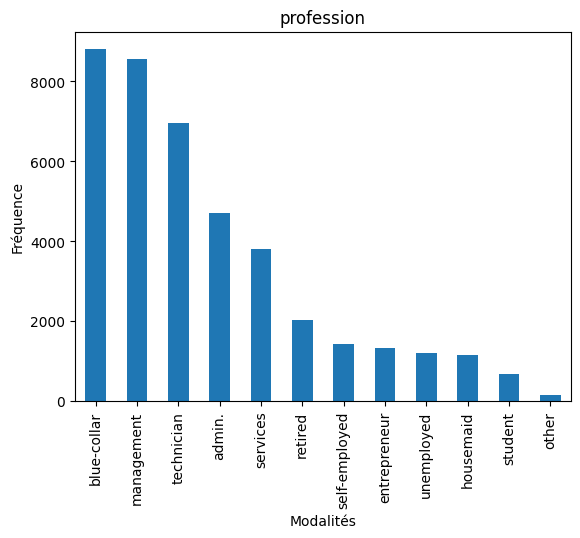

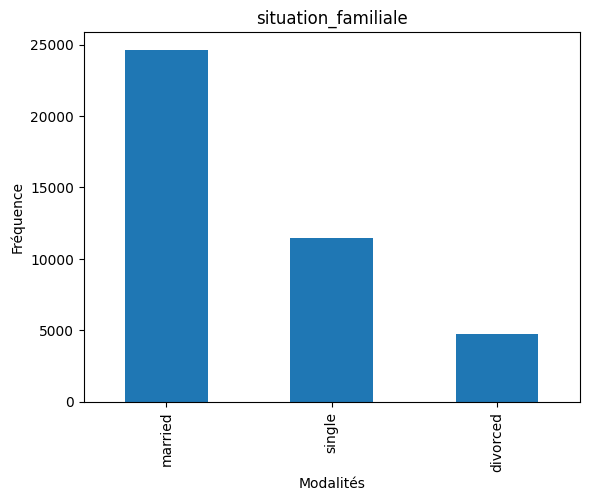

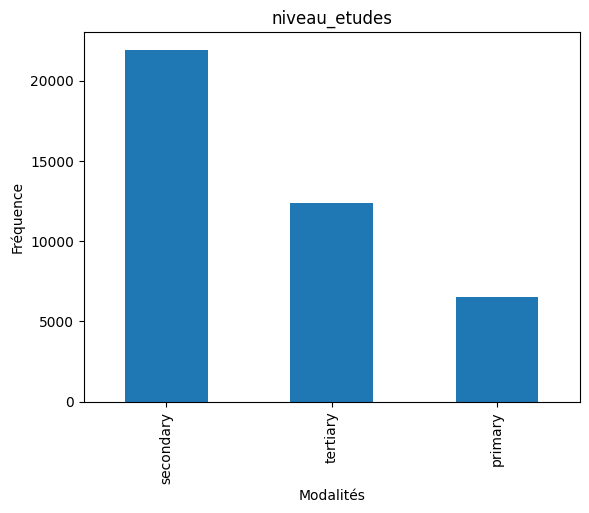

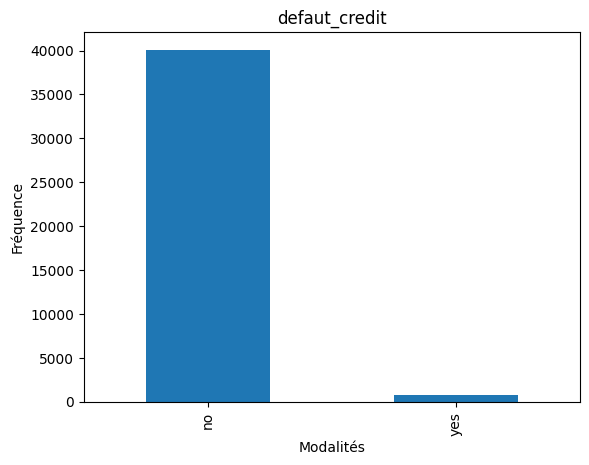

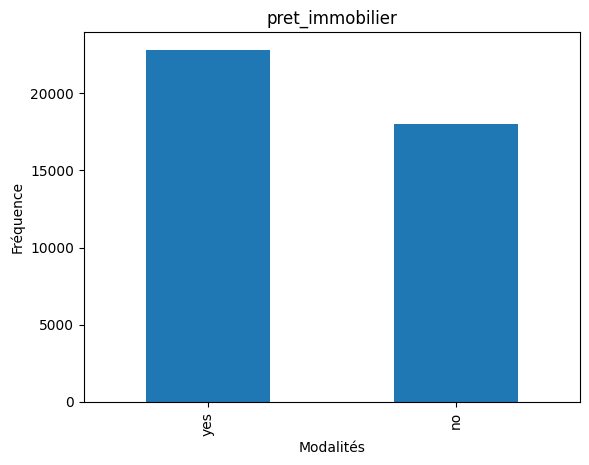

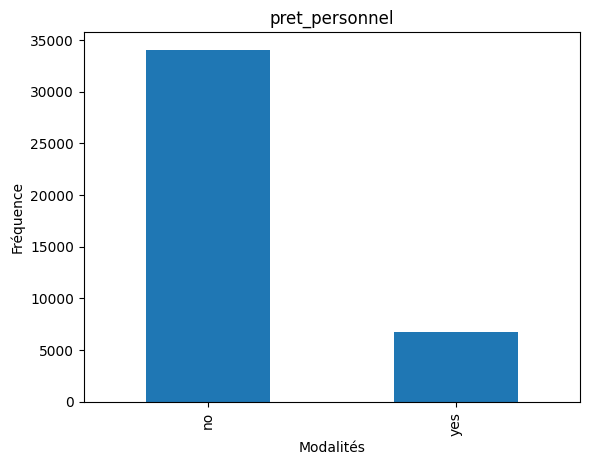

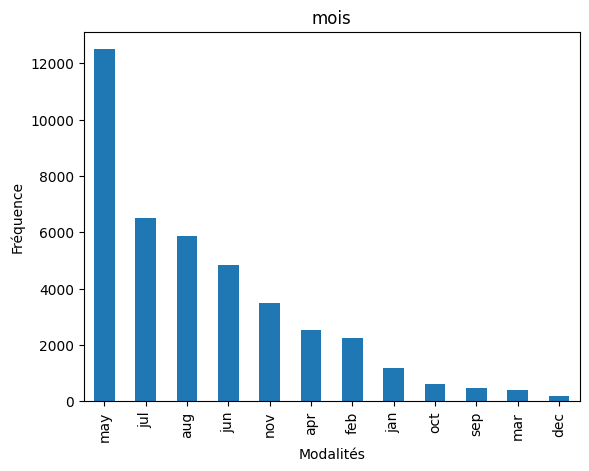

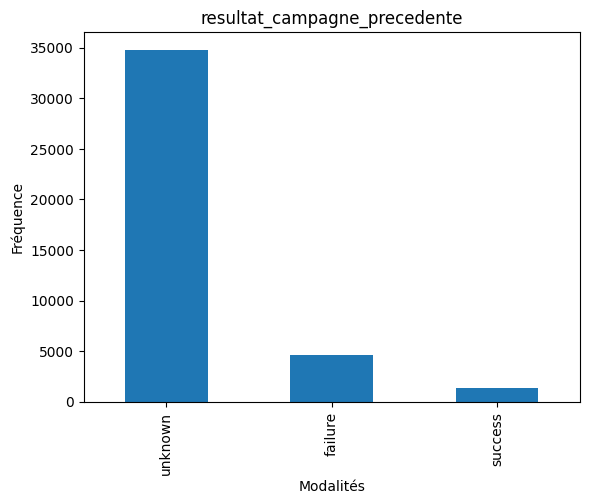

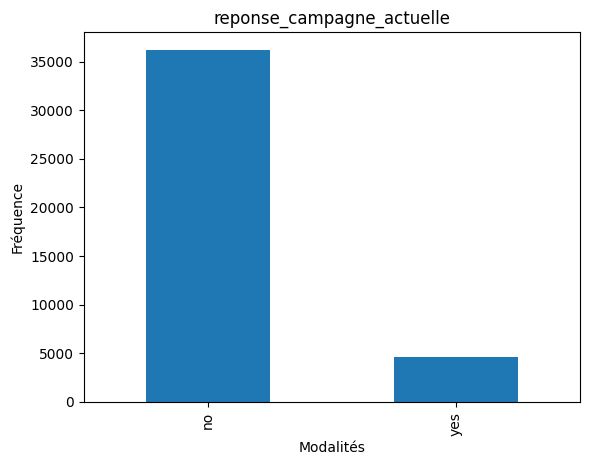

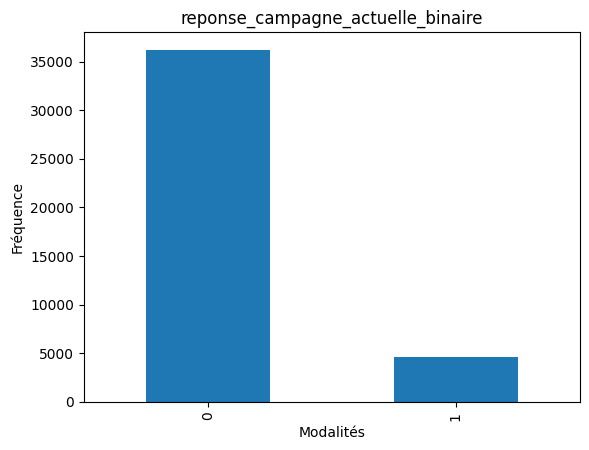

In [14]:

# Générer un bar plot pour chaque variable catégorielle
for var in cat_vars:
    bankdata[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Fréquence')
    plt.show()

In [ ]:
# Copyright 2024 ensai
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     https://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.



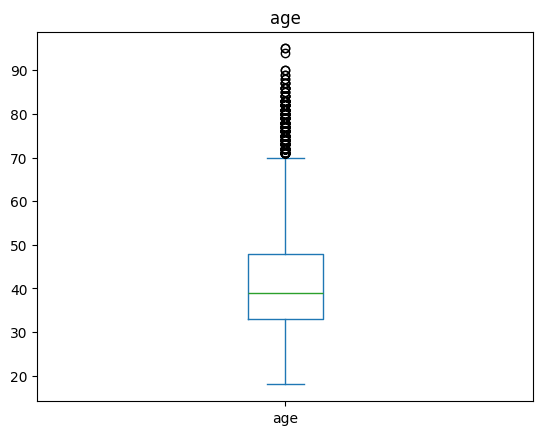

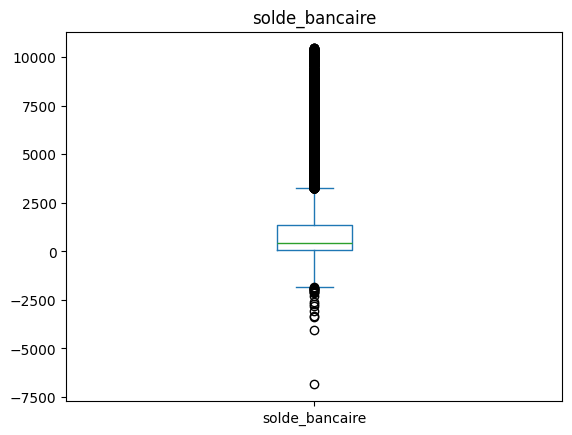

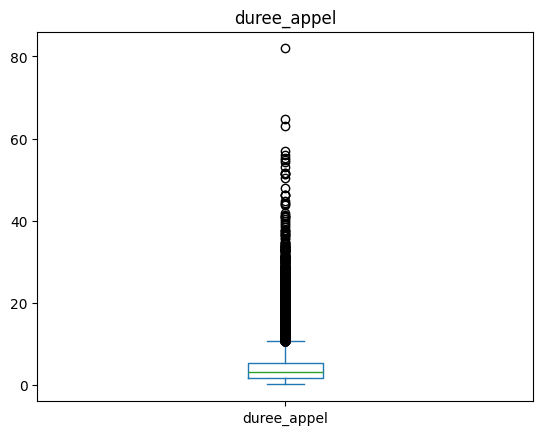

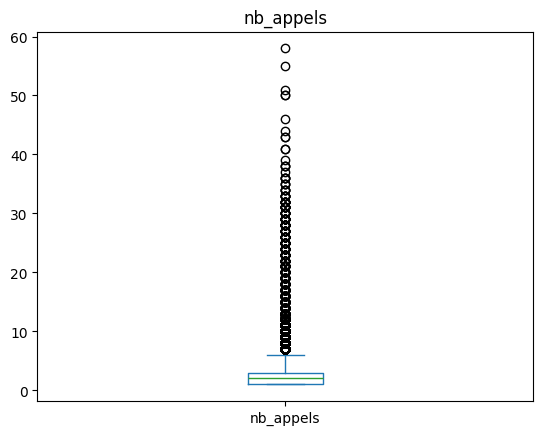

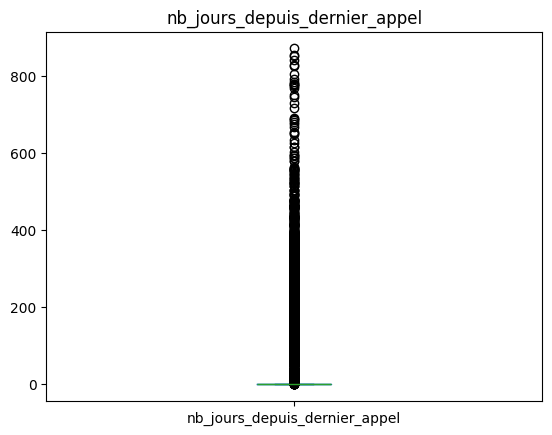

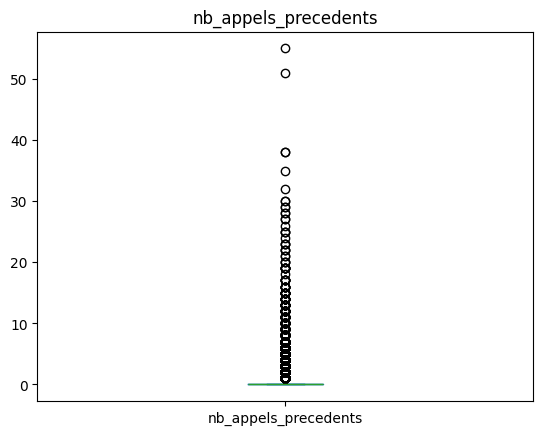

In [15]:


# Sélectionner les variables numériques
num_vars = ['age', 'solde_bancaire', 'duree_appel', 'nb_appels', 'nb_jours_depuis_dernier_appel', 'nb_appels_precedents']

# Générer un box plot pour chaque variable numérique
for var in num_vars:
    bankdata[var].plot(kind='box')
    plt.title(var)
    plt.show()

# Analyses bivariée

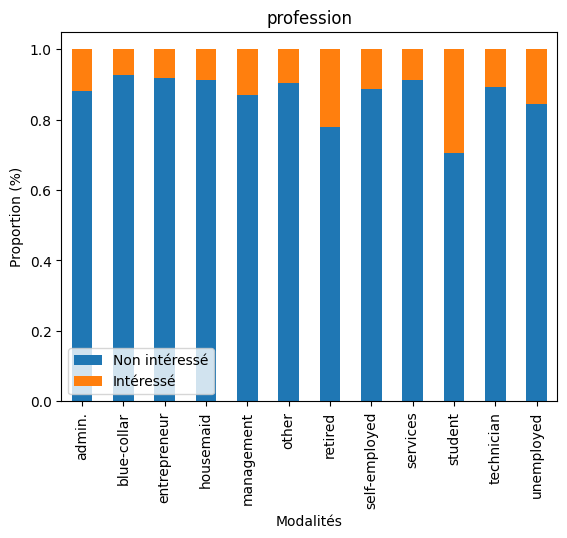

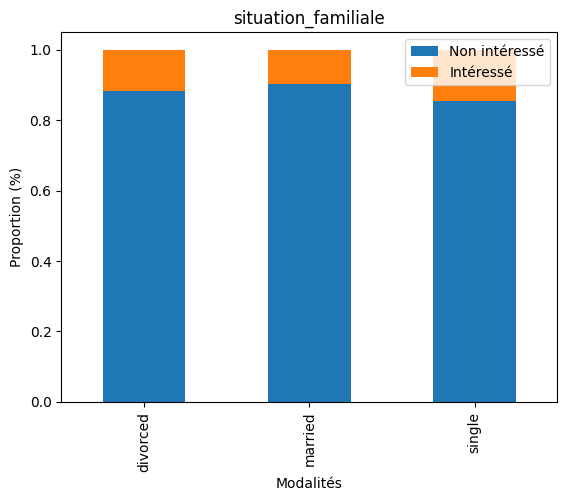

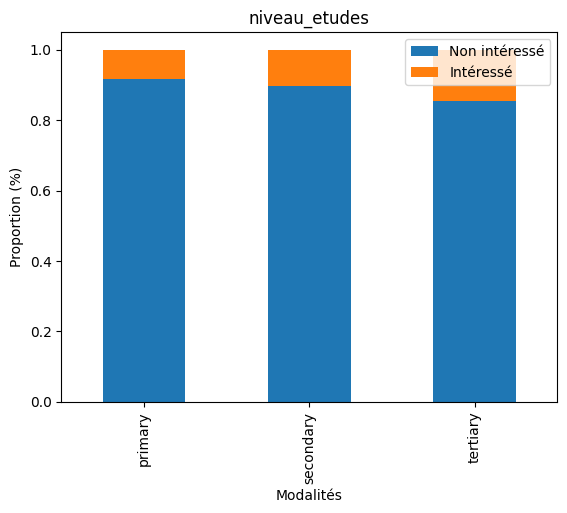

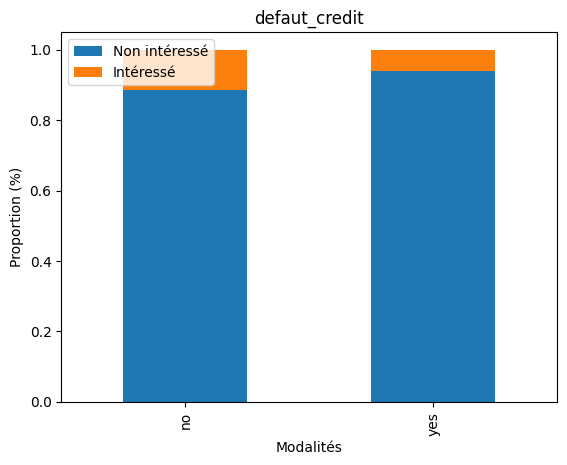

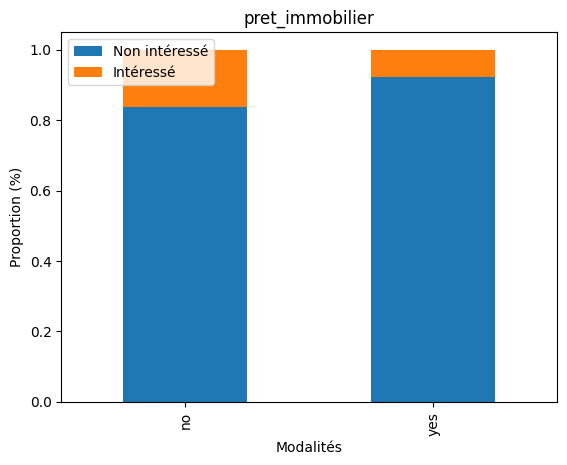

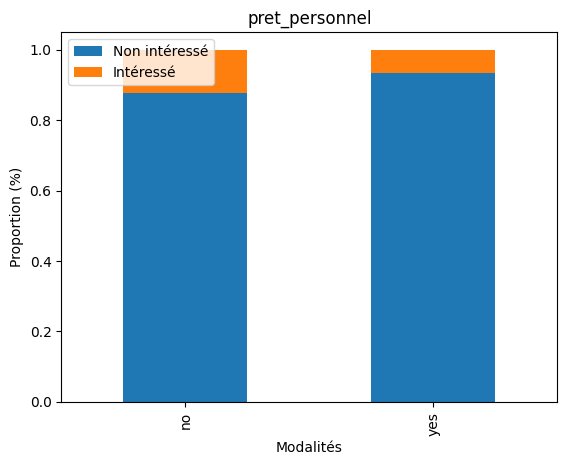

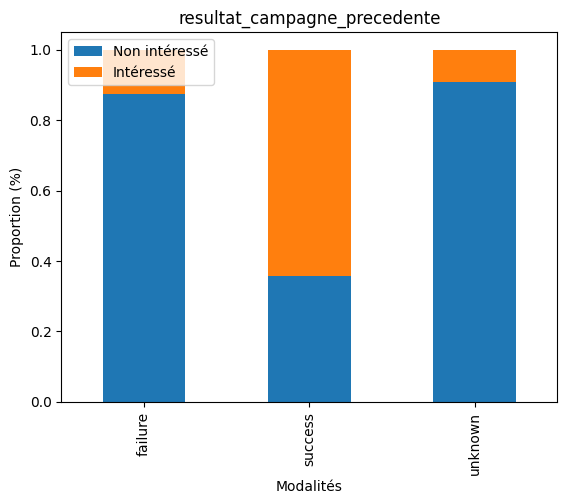

In [16]:
import seaborn as sns
# Sélectionner les variables catégorielles
# Sélectionner les variables catégorielles
cat_vars = ['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier', 'pret_personnel', 'resultat_campagne_precedente']


# Générer un count plot pour chaque variable catégorielle
# Définir la taille des figures




# Générer un bar plot pour chaque variable catégorielle
for var in cat_vars:
    figsize = (20, 20)
    (bankdata.groupby([var, 'reponse_campagne_actuelle_binaire'])['reponse_campagne_actuelle_binaire'].count()/bankdata.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Proportion (%)')
    plt.legend(['Non intéressé', 'Intéressé'])
    plt.show()

In [17]:

from scipy.stats import chi2_contingency
# Sélectionner les variables catégorielles
cat_vars = ['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier', 'pret_personnel', 'resultat_campagne_precedente']

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

# Parcourir toutes les variables catégorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(bankdata['reponse_campagne_actuelle_binaire'], bankdata[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
print(results_df)

                       Variable         Chi2       P-valeur  V de Cramer
6  resultat_campagne_precedente  4072.108164   0.000000e+00     0.315689
4               pret_immobilier   720.301364  1.151140e-158     0.132713
0                    profession   708.668621  7.474840e-145     0.130702
2                 niveau_etudes   210.723005   1.746147e-46     0.071489
1           situation_familiale   181.858771   3.234965e-40     0.066363
5                pret_personnel   176.976953   2.215667e-40     0.065642
3                 defaut_credit    21.401052   3.725668e-06     0.022350


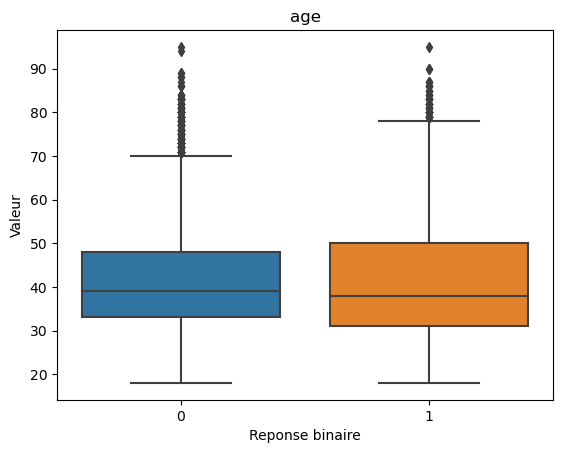

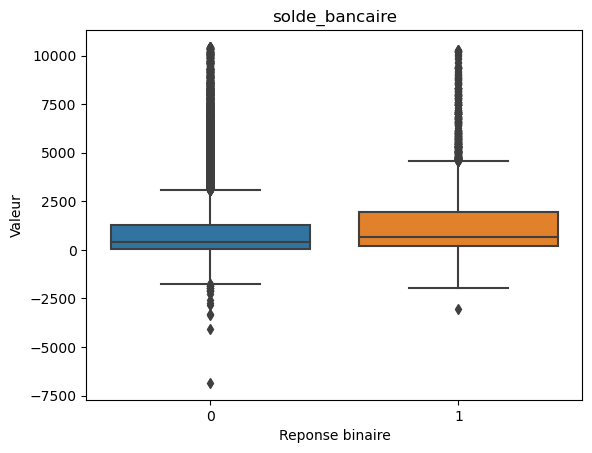

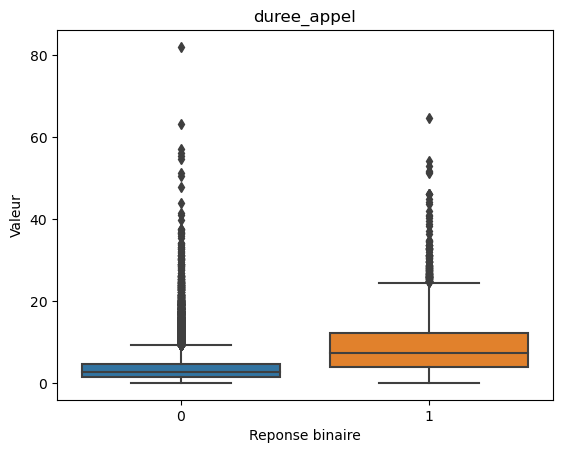

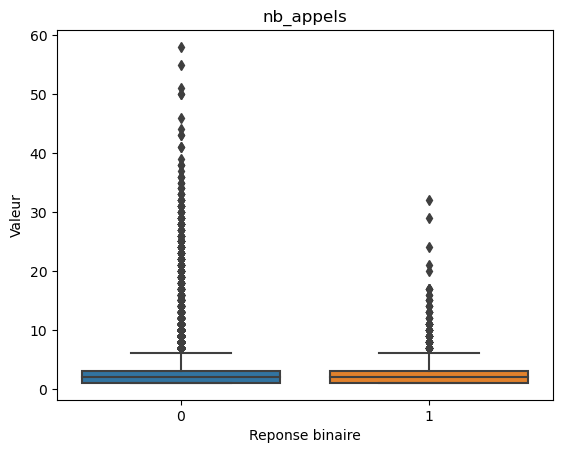

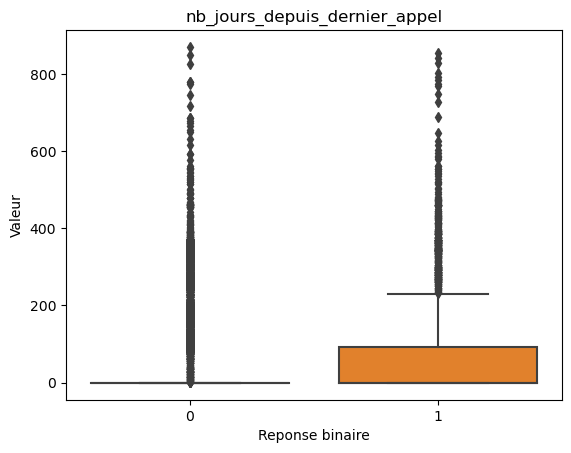

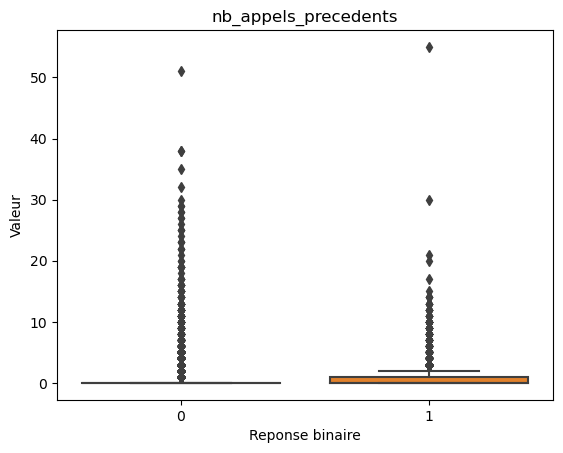

In [14]:
# Sélectionner les variables numériques

# Sélectionner les variables numériques
num_vars = ['age', 'solde_bancaire', 'duree_appel', 'nb_appels', 'nb_jours_depuis_dernier_appel', 'nb_appels_precedents']


# Générer un box plot pour chaque variable numérique
for var in num_vars:
    sns.boxplot(x='reponse_campagne_actuelle_binaire', y=var, data=bankdata)
    plt.title(var)
    plt.xlabel('Reponse binaire')
    plt.ylabel('Valeur')
    plt.show()

In [18]:
import scipy.stats as stats
# Initialiser les listes pour stocker les résultats
var_names = []
kw_stats = []
p_values = []

# Parcourir toutes les variables numériques
for var in num_vars:
    # Calculer les groupes de valeurs
    groups = [bankdata[bankdata['reponse_campagne_actuelle_binaire'] == 0][var], bankdata[bankdata['reponse_campagne_actuelle_binaire'] == 1][var]]
    # Appliquer le test de Kruskal-Wallis
    kw_stat, p = stats.kruskal(*groups)
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values
})

# Trier le DataFrame par ordre croissant de p-valeur
results_df.sort_values(by='P-valeur', inplace=True)

# Afficher le tableau des résultats
print(results_df)

                        Variable  Kruskal-Wallis       P-valeur
2                    duree_appel     4767.047442   0.000000e+00
5           nb_appels_precedents     1241.504630  5.825212e-272
4  nb_jours_depuis_dernier_appel     1060.285642  1.414875e-232
1                 solde_bancaire      367.404987   6.874073e-82
3                      nb_appels      290.919176   3.135286e-65
0                            age        4.517712   3.354567e-02


# Modélisation

In [25]:
import statsmodels.api as sm
# Sélectionner les variables explicatives et la variable d'intérêt
X = bankdata[['age', 'profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'solde_bancaire', 
              'pret_immobilier', 'pret_personnel', 'duree_appel', 'nb_appels', 'nb_jours_depuis_dernier_appel',
              'nb_appels_precedents', 'resultat_campagne_precedente']]
y = bankdata['reponse_campagne_actuelle_binaire']

In [26]:
# Convertir les variables catégorielles en variables indicatrices (dummies)
X = pd.get_dummies(X, columns=['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier',
                               'pret_personnel',  'resultat_campagne_precedente'], drop_first=True)


In [27]:
# Ajouter une constante pour l'interception
X = sm.add_constant(X)

In [28]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Créer le modèle de régression logistique
logit_model = sm.Logit(y_train, X_train)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [30]:
print(X_train.dtypes)

const                                   float64
age                                       int64
solde_bancaire                            int64
duree_appel                             float64
nb_appels                                 int64
nb_jours_depuis_dernier_appel             int64
nb_appels_precedents                      int64
profession_blue-collar                     bool
profession_entrepreneur                    bool
profession_housemaid                       bool
profession_management                      bool
profession_other                           bool
profession_retired                         bool
profession_self-employed                   bool
profession_services                        bool
profession_student                         bool
profession_technician                      bool
profession_unemployed                      bool
situation_familiale_married                bool
situation_familiale_single                 bool
niveau_etudes_secondary                 

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculer le VIF pour chaque variable explicative
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

# Afficher les résultats
print(vif)

    VIF Factor                              features
0   113.280676                                 const
1     1.649159                                   age
2     1.047648                        solde_bancaire
3     1.013305                           duree_appel
4     1.025593                             nb_appels
5     4.805838         nb_jours_depuis_dernier_appel
6     1.812787                  nb_appels_precedents
7     2.483125                profession_blue-collar
8     1.297411               profession_entrepreneur
9     1.289581                  profession_housemaid
10    3.023262                 profession_management
11    1.038067                      profession_other
12    1.691235                    profession_retired
13    1.322147              profession_self-employed
14    1.638126                   profession_services
15    1.190628                    profession_student
16    2.078461                 profession_technician
17    1.231003                 profession_unem

In [22]:
# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.245375
         Iterations 8


In [23]:
# Afficher le résumé des résultats de la régression
print(result.summary())

                                   Logit Regression Results                                  
Dep. Variable:     reponse_campagne_actuelle_binaire   No. Observations:                32672
Model:                                         Logit   Df Residuals:                    32645
Method:                                          MLE   Df Model:                           26
Date:                               Sun, 30 Apr 2023   Pseudo R-squ.:                  0.2973
Time:                                       23:43:37   Log-Likelihood:                -8016.9
converged:                                      True   LL-Null:                       -11409.
Covariance Type:                           nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 

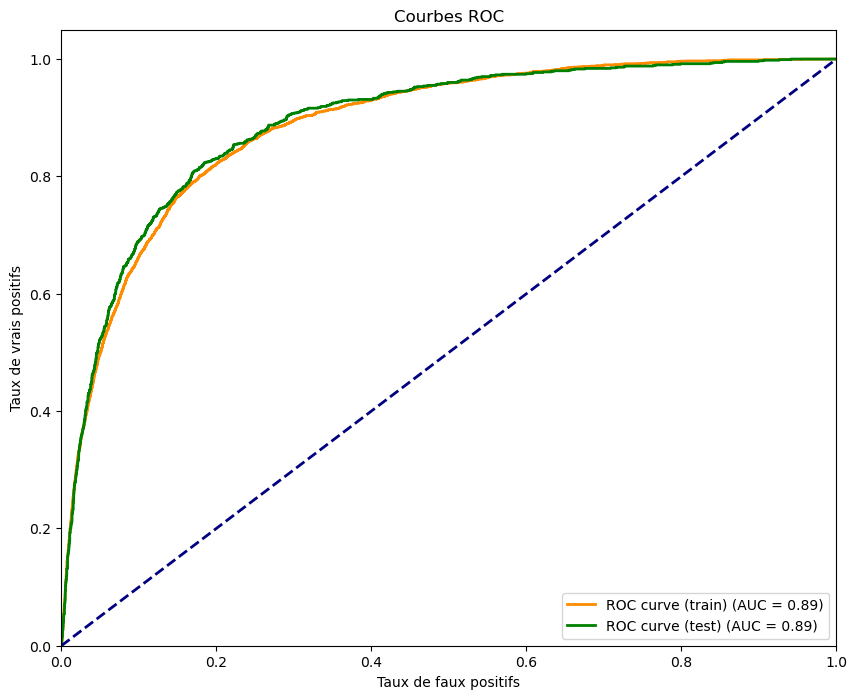

In [24]:
from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

# Oversampling, Undersampling et Smote

## Oversampling ou Suréchantillonnage


L'**oversampling** est une technique de rééchantillonnage utilisée pour gérer les ensembles de données déséquilibrés en augmentant le nombre d'échantillons de la classe minoritaire. Cela peut être fait en dupliquant les échantillons existants ou en générant de nouveaux échantillons synthétiques à partir des données existantes, par exemple en utilisant des méthodes telles que SMOTE (Synthetic Minority Over-sampling Technique) ou ADASYN (Adaptive Synthetic Sampling).

### Avantages

- Améliore la performance du modèle sur la classe minoritaire en augmentant la quantité d'informations disponibles pour l'apprentissage.
- Réduit le biais envers la classe majoritaire, ce qui peut améliorer la précision globale du modèle.
- Facilite la découverte de modèles significatifs dans les données en permettant aux algorithmes d'apprentissage d'explorer plus en profondeur la structure de la classe minoritaire.

### Inconvénients

- Peut entraîner un surapprentissage, car les échantillons dupliqués ou synthétiques peuvent augmenter la complexité du modèle sans apporter d'informations nouvelles.
- Augmente la taille de l'ensemble de données, ce qui peut augmenter les temps d'apprentissage et de prédiction.


### Analyses

In [26]:
# Importer les bibliothèques nécessaires
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialiser l'objet RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1, random_state=42)

# Appliquer l'oversampling sur les données d'apprentissage
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

# Créer un nouveau DataFrame avec les données oversampled
bankdata_oversampled = pd.concat([X_train_oversampled, y_train_oversampled], axis=1)



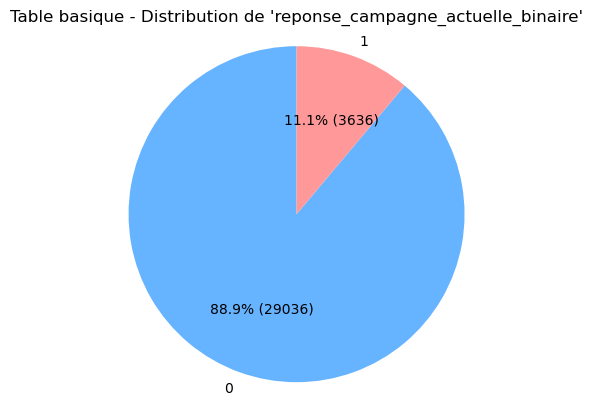

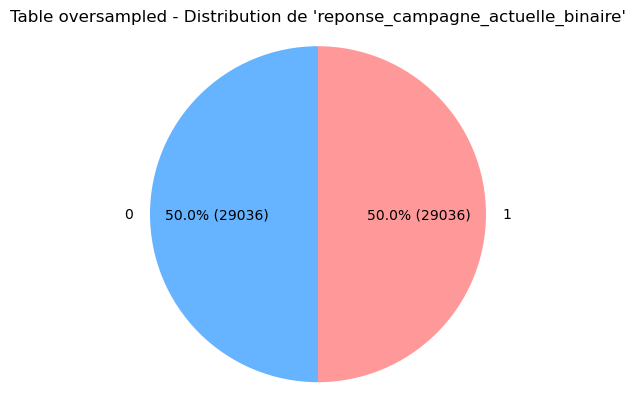

In [27]:
# Fonction pour créer un pie chart avec les proportions et les nombres
def plot_pie_chart(y, title):
    labels = ['0', '1']
    sizes = y.value_counts().values
    colors = ['#66b3ff', '#ff9999']
    
    # Modifier le format des labels pour inclure les proportions et les nombres
    def autopct_format(pct, all_values):
        absolute = int(round(pct / 100 * sum(all_values)))
        return f"{pct:.1f}% ({absolute})"

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: autopct_format(pct, sizes), startangle=90)
    ax.axis('equal')  # Pour assurer que le diagramme est bien rond
    plt.title(title)
    plt.show()

# Créer un pie chart pour la table basique
plot_pie_chart(y_train, "Table basique - Distribution de 'reponse_campagne_actuelle_binaire'")

# Créer un pie chart pour la table oversampled
plot_pie_chart(y_train_oversampled, "Table oversampled - Distribution de 'reponse_campagne_actuelle_binaire'")

### Impact sur le modèle

In [29]:
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score

# Entraîner et évaluer la régression logistique sur la base basique
logreg_basique = sm.Logit(y_train, X_train).fit()
y_pred_basique = logreg_basique.predict(X_test)
y_pred_basique_train = logreg_basique.predict(X_train)
auc_basique = roc_auc_score(y_test, y_pred_basique)
auc_train_basique = roc_auc_score(y_train, y_pred_basique_train)
# Entraîner et évaluer la régression logistique sur la base oversampled
logreg_oversampled = sm.Logit(y_train_oversampled, X_train_oversampled).fit(disp=0)
y_pred_oversampled = logreg_oversampled.predict(X_test)
auc_oversampled = roc_auc_score(y_test, y_pred_oversampled)
y_pred_oversampled_train = logreg_oversampled.predict(X_train_oversampled)
auc_oversampled_train = roc_auc_score(y_train_oversampled, y_pred_oversampled_train)


Optimization terminated successfully.
         Current function value: 0.245375
         Iterations 8


In [30]:

# Créer un DataFrame avec les performances
performances = pd.DataFrame({
    'Modèle': ['Base basique', 'Base oversampled'],
    'AUC - Entraînement': [auc_train_basique, auc_oversampled_train],
    'AUC - Test': [auc_basique, auc_oversampled]
})

# Afficher les performances
print(performances)

             Modèle  AUC - Entraînement  AUC - Test
0      Base basique            0.887054    0.890839
1  Base oversampled            0.888582    0.893050


  ## Undersampling ou sous échantillonage

L'**undersampling** est une technique de rééchantillonnage utilisée pour gérer les ensembles de données déséquilibrés en réduisant le nombre d'échantillons de la classe majoritaire. Cela peut être fait en supprimant aléatoirement des échantillons de la classe majoritaire ou en utilisant des méthodes plus sophistiquées telles que Tomek Links ou ENN (Edited Nearest Neighbors).

### Avantages

- Réduit la taille de l'ensemble de données, ce qui peut diminuer les temps d'apprentissage et de prédiction.
- Peut améliorer la performance du modèle sur la classe minoritaire en réduisant le biais envers la classe majoritaire.
- Élimine les échantillons bruyants ou redondants de la classe majoritaire, ce qui peut simplifier le modèle et éviter le surapprentissage.

### Inconvénients

- Peut entraîner une perte d'informations importantes en supprimant des échantillons de la classe majoritaire, ce qui peut nuire à la performance globale du modèle.
- Ne résout pas toujours le problème du déséquilibre des classes ; dans certains cas, l'oversampling ou d'autres techniques de rééchantillonnage peuvent être plus appropriées.
- Peut ne pas être efficace si la classe majoritaire contient de nombreuses sous-classes ou groupes distincts, car l'undersampling peut éliminer certains de ces groupes et réduire la capacité du modèle à les distinguer.

### Analyse

In [31]:
# Importer les bibliothèques nécessaires
from imblearn.under_sampling import RandomUnderSampler

# Initialiser l'objet RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Appliquer l'undersampling sur les données d'apprentissage
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Créer un nouveau DataFrame avec les données undersampled
bankdata_undersampled = pd.concat([X_train_undersampled, y_train_undersampled], axis=1)

# Afficher la nouvelle distribution des données
print(bankdata_undersampled['reponse_campagne_actuelle_binaire'].value_counts())

0    3636
1    3636
Name: reponse_campagne_actuelle_binaire, dtype: int64


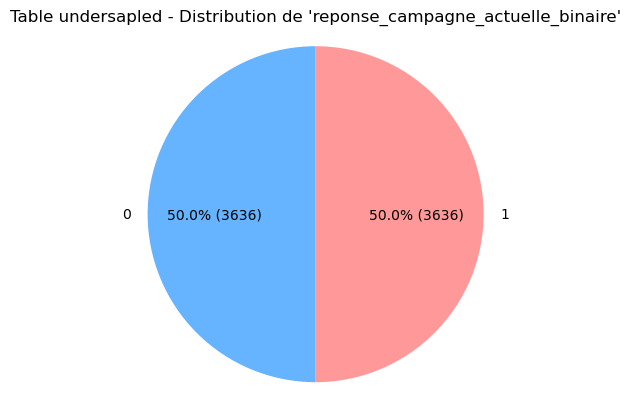

In [32]:


# Créer un pie chart pour la table oversampled
plot_pie_chart(y_train_undersampled, "Table undersapled - Distribution de 'reponse_campagne_actuelle_binaire'")

### Impact sur le modèle

In [ ]:
# Entraîner et évaluer la régression logistique sur la base undersampled

# Entraîner et évaluer la régression logistique sur la base oversampled
lr_undersampled = sm.Logit(y_train_undersampled, X_train_undersampled).fit()


y_pred_undersampled = lr_undersampled.predict(X_test)
auc_undersampled = roc_auc_score(y_test, y_pred_undersampled)

# Ajouter les performances de la base undersampled au DataFrame
performances.loc[2] = ['Base undersampled', auc_undersampled, auc_undersampled]

# Afficher les performances
print(performances)

## Rééchantillonage SMOTE (Synthetic Minority Over-sampling Technique)

## SMOTE (Synthetic Minority Over-sampling Technique)

**SMOTE** est une technique de rééchantillonnage spécifique pour gérer les ensembles de données déséquilibrés. 

**SMOTE génère des échantillons synthétiques de la classe minoritaire en utilisant l'interpolation entre les échantillons existants**. Pour chaque échantillon de la classe minoritaire, SMOTE sélectionne un certain nombre de ses voisins les plus proches appartenant à la même classe, puis génère de nouveaux échantillons en interpolant les attributs de l'échantillon original et de ses voisins.

### Avantages

- Améliore la performance du modèle sur la classe minoritaire en augmentant la quantité d'informations disponibles pour l'apprentissage.
- Réduit le biais envers la classe majoritaire, ce qui peut améliorer la précision globale du modèle.
- Génère des échantillons synthétiques plutôt que de dupliquer les échantillons existants, ce qui peut aider à éviter le surapprentissage et permettre une meilleure généralisation.


### Inconvénients

- Peut créer des échantillons synthétiques qui ne représentent pas la réalité, ce qui peut entraîner un modèle moins robuste ou moins généralisable.
- Augmente la taille de l'ensemble de données, ce qui peut augmenter les temps d'apprentissage et de prédiction.


In [ ]:
## Rééchantillonge SMOTE sur la base d'apprentissage
from imblearn.over_sampling import SMOTE

# Initialiser l'objet SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Appliquer le rééchantillonnage SMOTE sur les données d'apprentissage
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Créer un nouveau DataFrame avec les données rééchantillonnées
bankdata_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

# Afficher la nouvelle distribution des données

plot_pie_chart(y_train_smote, "Table SMOTE - Distribution de 'reponse_campagne_actuelle_binaire'")

In [ ]:
# Entraîner et évaluer la régression logistique sur la base SMOTE




lr_smote = sm.Logit(y_train_smote, X_train_smote).fit()
y_pred_smote = lr_smote.predict(X_test)
auc_smote = roc_auc_score(y_test, y_pred_smote)

# Ajouter les performances de la base SMOTE au DataFrame
performances.loc[3] = ['Base SMOTE', auc_smote, auc_smote]

# Afficher les performances
print(performances)

## ADASYN (Adaptive Synthetic Sampling)

**ADASYN** est une technique de rééchantillonnage pour gérer les ensembles de données déséquilibrés. 

ADASYN est similaire à SMOTE, **mais génère des échantillons synthétiques en adaptant la densité des échantillons minoritaires selon leurs voisins**. ADASYN accorde plus d'importance aux échantillons de la classe minoritaire qui sont difficiles à apprendre, en créant plus d'échantillons synthétiques pour ces échantillons.

### Avantages

- Améliore la performance du modèle sur la classe minoritaire en augmentant la quantité d'informations disponibles pour l'apprentissage.
- Réduit le biais envers la classe majoritaire, ce qui peut améliorer la précision globale du modèle.
- Génère des échantillons synthétiques adaptés aux régions où la classe minoritaire est difficile à apprendre, ce qui peut aider à éviter le surapprentissage et permettre une meilleure généralisation.
- Peut être combiné avec d'autres techniques de rééchantillonnage, telles que l'undersampling, pour créer un ensemble de données équilibré.

### Inconvénients

- Peut créer des échantillons synthétiques qui ne représentent pas la réalité, ce qui peut entraîner un modèle moins robuste ou moins généralisable.
- Augmente la taille de l'ensemble de données, ce qui peut augmenter les temps d'apprentissage et de prédiction.


### Implémentation

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)



# Créer un pie chart pour la table oversampled
plot_pie_chart(y_train_adasyn, "Table ADASYN - Distribution de 'reponse_campagne_actuelle_binaire'")

In [33]:
# Fonction pour l'oversampling stratifié basé sur une colonne spécifique
def stratified_oversampling(data, target_col, stratify_col):
    unique_strata = data[stratify_col].unique()
    oversampled_data = pd.DataFrame(columns=data.columns)

    for stratum in unique_strata:
        stratum_data = data[data[stratify_col] == stratum]
        X = stratum_data.drop(target_col, axis=1)
        y = stratum_data[target_col]

        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(X, y)

        resampled_data = pd.concat([X_resampled, y_resampled], axis=1)
        oversampled_data = pd.concat([oversampled_data, resampled_data])

    return oversampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Application de l'oversampling stratifié
oversampled_bankdata = stratified_oversampling(bankdata, 'reponse_campagne_actuelle_binaire', 'niveau_etudes')

# Affichage des proportions de niveaux d'études avant et après l'oversampling stratifié
print("Proportions avant l'oversampling stratifié :")
print(bankdata['niveau_etudes'].value_counts(normalize=True))

print("\nProportions après l'oversampling stratifié :")
print(oversampled_bankdata['niveau_etudes'].value_counts(normalize=True))

Proportions avant l'oversampling stratifié :
secondary    0.537034
tertiary     0.303127
primary      0.159839
Name: niveau_etudes, dtype: float64

Proportions après l'oversampling stratifié :
secondary    0.542898
tertiary     0.291890
primary      0.165212
Name: niveau_etudes, dtype: float64
